In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
import yfinance as yf
import seaborn as sns

In [2]:
# Import the NVDA dataset into a Pandas Dataframe
NVDA_df = yf.download('NVDA', '2020-08-31', '2023-08-31')
# Review the DataFrame
NVDA_df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-31,131.827499,135.750000,130.377502,133.744995,133.376663,50084000
2020-09-01,134.800003,139.937500,134.365005,138.210007,137.870590,51131600
2020-09-02,147.037506,147.267502,139.000000,143.464996,143.112671,87401200
2020-09-03,138.287506,138.845001,128.787506,130.154999,129.835388,94512800
2020-09-04,127.837502,131.750000,117.047501,126.224998,125.915031,146368400


In [3]:
# Calculate the daily returns using the closing prices and the pct_change function
NVDA_df["daily_returns"] = NVDA_df["Close"].pct_change()

# Drop all NaN values from the DataFrame
NVDA_df = NVDA_df.dropna()

# Review the DataFrame
display(NVDA_df.head())
display(NVDA_df.tail())

,Open,High,Low,Close,Adj Close,Volume,daily_returns
Date,,,,,,,
2020-09-01,134.800003,139.937500,134.365005,138.210007,137.870590,51131600,0.033385
2020-09-02,147.037506,147.267502,139.000000,143.464996,143.112671,87401200,0.038022
2020-09-03,138.287506,138.845001,128.787506,130.154999,129.835388,94512800,-0.092775
2020-09-04,127.837502,131.750000,117.047501,126.224998,125.915031,146368400,-0.030195
2020-09-08,117.345001,125.500000,117.042503,119.129997,118.837440,79572800,-0.056209


,Open,High,Low,Close,Adj Close,Volume,daily_returns
Date,,,,,,,
2023-08-24,502.160004,502.660004,471.589996,471.630005,471.591156,115604400,0.000998
2023-08-25,470.119995,478.049988,450.239990,460.179993,460.142090,92534100,-0.024278
2023-08-28,464.820007,469.799988,448.880005,468.350006,468.311432,68519200,0.017754
2023-08-29,466.660004,490.809998,463.910004,487.839996,487.799805,70139700,0.041614
2023-08-30,490.440002,499.269989,484.250000,492.640015,492.599426,73520600,0.009839


In [4]:
# Define a window size of 50
short_window = 50

# Create a simple moving average (SMA) using the short_window and assign this to a new columns called sma_fast
NVDA_df["sma_fast"] = NVDA_df["Close"].rolling(window=short_window).mean()

C:\Users\makad\AppData\Local\Temp\ipykernel_14492\3566899212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NVDA_df["sma_fast"] = NVDA_df["Close"].rolling(window=short_window).mean()


In [5]:
# Define a window size of 100
long_window = 100

# Create a simple moving average (SMA) using the long_window and assign this to a new columns called sma_slow
NVDA_df["sma_slow"] =NVDA_df["Close"].rolling(window=long_window).mean()

C:\Users\makad\AppData\Local\Temp\ipykernel_14492\2936622712.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NVDA_df["sma_slow"] =NVDA_df["Close"].rolling(window=long_window).mean()


In [6]:
# Drop the NaNs using dropna()
NVDA_df = NVDA_df.dropna()

In [7]:
 # Assign a copy of the sma_fast and sma_slow columns to a new DataFrame called X
X = NVDA_df[["sma_fast", "sma_slow"]].copy()

# Display sample data
display(X.head())
display(X.tail())

,sma_fast,sma_slow
Date,,
2021-01-25,132.816201,132.514476
2021-01-26,132.819651,132.475900
2021-01-27,132.711851,132.333026
2021-01-28,132.662651,132.336576
2021-01-29,132.557551,132.373301


,sma_fast,sma_slow
Date,,
2023-08-24,440.6030,375.428100
2023-08-25,441.2072,377.233400
2023-08-28,442.0436,379.171600
2023-08-29,443.2620,381.361900
2023-08-30,444.3532,383.584601


In [8]:
# Create a new column in the NVDA_df called signal setting its value to zero.
NVDA_df["signal"] = 0.0

In [9]:
 # Create the signal to buy
NVDA_df.loc[(NVDA_df["daily_returns"] >= 0), "signal"] = 1

In [10]:
# Create the signal to sell
NVDA_df.loc[(NVDA_df["daily_returns"] < 0), "signal"] = -1

In [11]:
 # Copy the new signal column to a new Series called y.
y = NVDA_df["signal"].copy()

In [12]:
 # Imports 
from pandas.tseries.offsets import DateOffset

In [13]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2021-01-25 00:00:00


In [14]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=6)

# Display the training end date
print(training_end)

2021-07-25 00:00:00


In [15]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Display sample data
X_train.head()

,sma_fast,sma_slow
Date,,
2021-01-25,132.816201,132.514476
2021-01-26,132.819651,132.475900
2021-01-27,132.711851,132.333026
2021-01-28,132.662651,132.336576
2021-01-29,132.557551,132.373301


In [16]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Display sample data
X_test.head()

,sma_fast,sma_slow
Date,,
2021-07-26,180.059699,160.059000
2021-07-27,181.052700,160.742775
2021-07-28,182.120200,161.446925
2021-07-29,183.249449,162.253800
2021-07-30,184.336100,162.951675


In [17]:
# Imports
from sklearn.preprocessing import StandardScaler

In [18]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Imports
from sklearn import svm
from sklearn.metrics import classification_report

In [20]:
# Create the classifier model
svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.67      0.11      0.18        56
         1.0       0.57      0.96      0.72        70

    accuracy                           0.58       126
   macro avg       0.62      0.53      0.45       126
weighted avg       0.61      0.58      0.48       126



In [22]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [23]:
# Evaluate the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.50      0.03      0.06       255
         1.0       0.52      0.97      0.68       274

    accuracy                           0.52       529
   macro avg       0.51      0.50      0.37       529
weighted avg       0.51      0.52      0.38       529



In [24]:
# Create a new empty predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["predicted_signal"] = testing_signal_predictions
predictions_df["daily_returns"] = NVDA_df["daily_returns"]
predictions_df["trading_algorithm_returns"] = predictions_df["daily_returns"] * predictions_df["predicted_signal"]
predictions_df.head(20)

,predicted_signal,daily_returns,trading_algorithm_returns
Date,,,
2021-07-26,-1.0,-0.013498,0.013498
2021-07-27,-1.0,-0.004457,0.004457
2021-07-28,-1.0,0.015358,-0.015358
2021-07-29,-1.0,0.008153,-0.008153
2021-07-30,-1.0,-0.008290,0.008290
2021-08-02,-1.0,0.012872,-0.012872
2021-08-03,1.0,0.003291,0.003291
2021-08-04,1.0,0.023164,0.023164
2021-08-05,1.0,0.017905,0.017905


<Axes: xlabel='Date'>

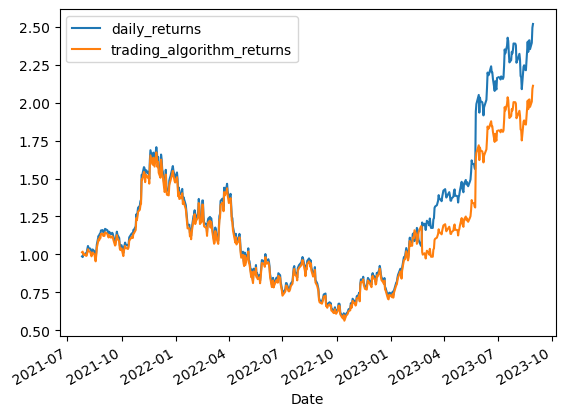

In [25]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["daily_returns", "trading_algorithm_returns"]]).cumprod().plot()

In [26]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [27]:
# Create an instance of the LogisticRegression model
logistic_regression_model = LogisticRegression()

In [28]:
# Fit the LogisticRegression model
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [29]:
# Use the trained LogisticRegression model to predict the trading signals for the training data
lr_training_signal_predictions = logistic_regression_model.predict(X_train_scaled)

# Display the predictions
lr_training_signal_predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [30]:
 # Generate a classification report using the training data and the logistic regression model's predications
lr_training_report = classification_report(y_train, lr_training_signal_predictions)

# Review the classification report
print(lr_training_report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        56
         1.0       0.56      1.00      0.71        70

    accuracy                           0.56       126
   macro avg       0.28      0.50      0.36       126
weighted avg       0.31      0.56      0.40       126



C:\Users\makad\anaconda3\envs\algotrading\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\makad\anaconda3\envs\algotrading\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\makad\anaconda3\envs\algotrading\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Use the trained model to predict the trading signals for the testing data.
lr_testing_signal_predictions = logistic_regression_model.predict(X_test_scaled)

In [32]:
# Generate a classification report using the testing data and the logistic regression model's predictions
lr_testing_report = classification_report(y_test, lr_testing_signal_predictions)

# Review the testing classification report
print(lr_testing_report)

              precision    recall  f1-score   support

        -1.0       0.54      0.10      0.17       255
         1.0       0.52      0.92      0.67       274

    accuracy                           0.53       529
   macro avg       0.53      0.51      0.42       529
weighted avg       0.53      0.53      0.43       529



In [33]:
 # Print the classification report for the Logistic Regression model using the test data
print("Logistic Regression Classification Report")
print(lr_testing_report)

Logistic Regression Classification Report
              precision    recall  f1-score   support

        -1.0       0.54      0.10      0.17       255
         1.0       0.52      0.92      0.67       274

    accuracy                           0.53       529
   macro avg       0.53      0.51      0.42       529
weighted avg       0.53      0.53      0.43       529



In [34]:
# Print the classification report for the SVM model using the test data
print("SVM Classification Report")
print(svm_testing_report)

SVM Classification Report
              precision    recall  f1-score   support

        -1.0       0.50      0.03      0.06       255
         1.0       0.52      0.97      0.68       274

    accuracy                           0.52       529
   macro avg       0.51      0.50      0.37       529
weighted avg       0.51      0.52      0.38       529



In [35]:
#This is where we will change our Buy and Sell signals using TA-Lib to utilize the RSI and Ichimoku CLoud indicators

In [36]:
#Import TA-Lib
import talib

In [37]:
# Fetch daily stock price data of Apple
NVDA_TA_df = yf.download('NVDA', '2020-05-09', '2023-08-21')

[*********************100%%**********************]  1 of 1 completed


In [38]:
#Calculate RSI
NVDA_TA_df['RSI'] = talib.RSI(NVDA_TA_df.Close,14)
NVDA_TA_df.tail()


,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2023-08-14,404.859985,438.000000,403.109985,437.529999,437.493958,69028600,49.755397
2023-08-15,445.600006,452.679993,437.100006,439.399994,439.363800,67651200,50.480701
2023-08-16,445.200012,446.750000,434.059998,434.859985,434.824158,52745100,48.644726
2023-08-17,439.700012,440.619995,430.010010,433.440002,433.404297,45239500,48.056017
2023-08-18,426.350006,435.779999,416.600006,432.989990,432.954315,58262200,47.858344


<function matplotlib.pyplot.show(close=None, block=None)>

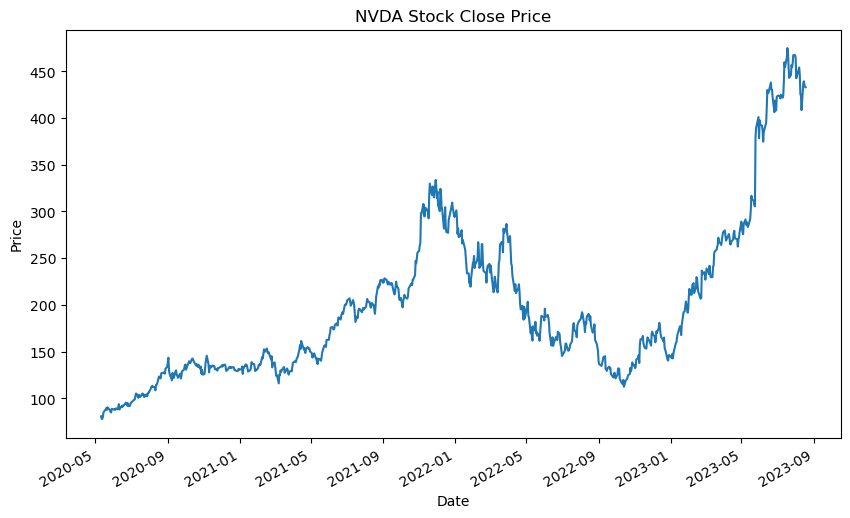

In [39]:
#Plot price data
NVDA_TA_df['Close'].plot(figsize=(10,6))
plt.title('NVDA Stock Close Price')
plt.ylabel('Price')
plt.show

In [40]:
# Calculate Tenkan-sen
high_9 = NVDA_TA_df.High.rolling(9).max()
low_9 = NVDA_TA_df.Low.rolling(9).min()
NVDA_TA_df['tenkan_sen_line'] = (high_9 + low_9) /2

# Calculate Kijun-sen
high_26 = NVDA_TA_df.High.rolling(26).max()
low_26 = NVDA_TA_df.Low.rolling(26).min()
NVDA_TA_df['kijun_sen_line'] = (high_26 + low_26) /2

# Calculate Senkou Span A
NVDA_TA_df['senkou_span_A'] = ((NVDA_TA_df.tenkan_sen_line + NVDA_TA_df.kijun_sen_line) / 2).shift(26)

# Calculate Senkou Span B
high_52 = NVDA_TA_df.High.rolling(52).max()
low_52 = NVDA_TA_df.Low.rolling(52).min()
NVDA_TA_df['senkou_span_B'] = ((high_52 + low_52) /2).shift(26)

# Calculate Chikou Span B
NVDA_TA_df['chikou_span'] = NVDA_TA_df.Close.shift(-26)

In [41]:
#Generate Trading Signals
NVDA_TA_df['signal'] = 0
NVDA_TA_df.loc[(NVDA_TA_df.Close > NVDA_TA_df.senkou_span_A) & (NVDA_TA_df.tenkan_sen_line > NVDA_TA_df.kijun_sen_line) & (NVDA_TA_df.RSI >50), 'signal'] = 1

NVDA_TA_df.loc[(NVDA_TA_df.Close < NVDA_TA_df.senkou_span_B) & (NVDA_TA_df.tenkan_sen_line < NVDA_TA_df.kijun_sen_line) & (NVDA_TA_df.RSI < 50), 'signal'] = -1

In [42]:
# Visualize entry positions relative to close price
entry = NVDA_TA_df[NVDA_TA_df['signal'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    marker='^',
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400)

In [43]:
# Visualize exit positions relative to close price
exit = NVDA_TA_df[NVDA_TA_df['signal'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    marker='v',
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400)

In [44]:
# Visualize entry position relative to close price
entry = NVDA_TA_df[NVDA_TA_df["signal"] == 1.0]["Close"].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = NVDA_TA_df[NVDA_TA_df["signal"] == -1.0]["Close"].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

In [45]:
entry * exit

:Overlay
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

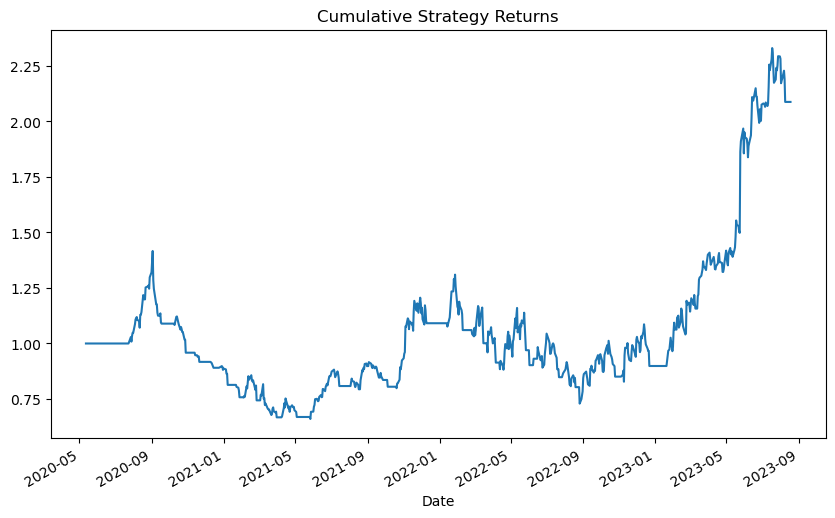

In [46]:
# Calculate daily returns
NVDA_TA_df['returns'] = NVDA_TA_df['Close']. pct_change()

# Calculate strategy returns
NVDA_TA_df['strategy_returns'] = NVDA_TA_df['returns'] * NVDA_TA_df['signal'].shift(1)

# Plot cumulative returns
cumulative_returns = (NVDA_TA_df['strategy_returns']+1).cumprod()
cumulative_returns.plot(figsize=(10,6))
plt.title('Cumulative Strategy Returns')
plt.show()

In [47]:
# Drop NA values from Dataframe
NVDA_TA_df.dropna(inplace=True) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


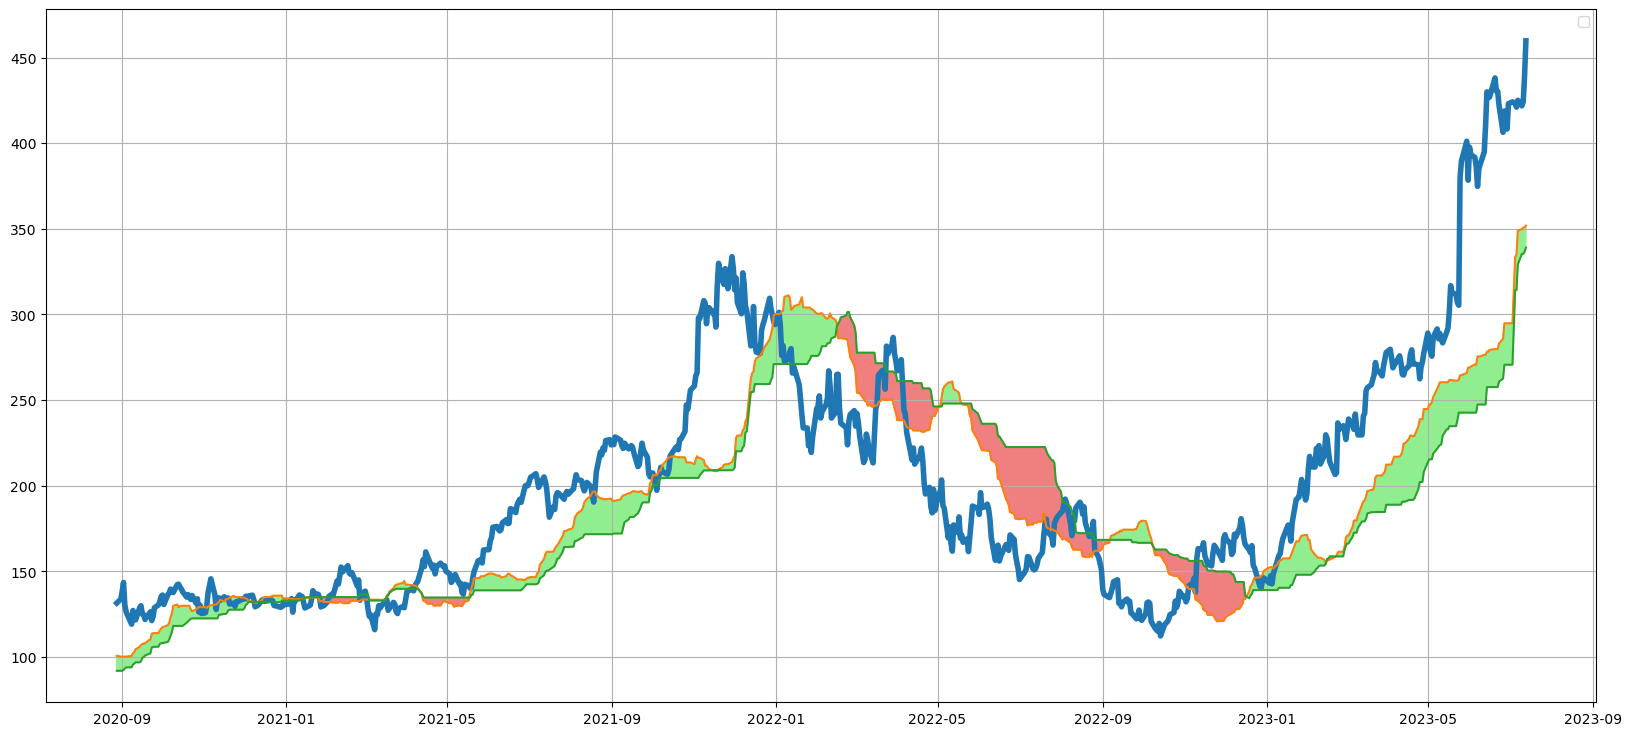

In [48]:
# Add figure and axis objects
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(20, 9))

# Plot Close with index on x-axis with a line thickness of 4
ax.plot(NVDA_TA_df.index, NVDA_TA_df['Close'], linewidth=4)

# Plot Leading Span A with index on the shared x-axis
ax.plot(NVDA_TA_df.index, NVDA_TA_df['senkou_span_A'])

# Plot Leading Span B with index on the sahred x-axis
ax.plot(NVDA_TA_df.index, NVDA_TA_df['senkou_span_B'])

# Use the fill_between of ax object to specify where to fill
ax.fill_between(NVDA_TA_df.index, NVDA_TA_df['senkou_span_A'], NVDA_TA_df['senkou_span_B'],
                where=NVDA_TA_df['senkou_span_A'] >= NVDA_TA_df['senkou_span_B'], color='lightgreen')

ax.fill_between(NVDA_TA_df.index, NVDA_TA_df['senkou_span_A'], NVDA_TA_df['senkou_span_B'],
                where=NVDA_TA_df['senkou_span_A'] < NVDA_TA_df['senkou_span_B'], color='lightcoral')

plt.legend(loc=0)
plt.grid()
plt.show()